problem 1

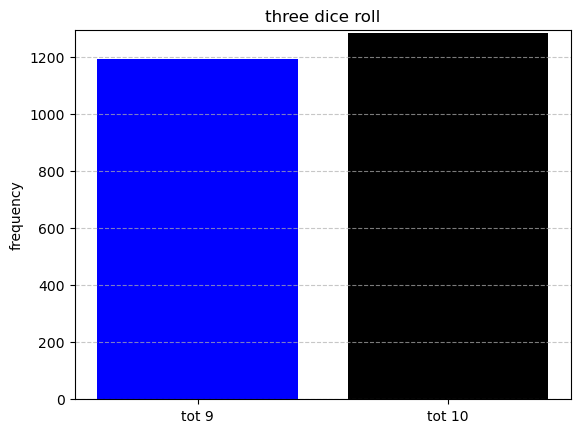

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def roll_dice(num_rolls):
    results = np.random.randint(1, 7, (num_rolls, 3))
    totals = results.sum(axis=1)
    return totals

def compare_frequencies(num_rolls):
    totals = roll_dice(num_rolls)
    count_9 = np.sum(totals == 9)
    count_10 = np.sum(totals == 10)
    return count_9, count_10

def plot_results(count_9, count_10):
    labels = ['tot 9', 'tot 10']
    counts = [count_9, count_10]

    plt.bar(labels, counts, color=['blue', 'black'])
    plt.title('three dice roll')
    plt.ylabel('frequency')
    plt.ylim(0, max(counts) + 10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def main():
    num_rolls = int(input("how many times you want to roll: "))

    count_9, count_10 = compare_frequencies(num_rolls)
    plot_results(count_9, count_10)

if __name__ == "__main__":
    main()

problem 2

In [15]:
import numpy as np

def simulate_election(num_voters, trump_support, biden_support, num_simulations):
    results = {
        "trump_wins": 0,
        "biden_wins": 0,
        "no_winner": 0
    }

    for i in range(num_simulations):
        voter_choices = np.random.choice(
            ['Trump', 'Biden'],
            size=num_voters,
            p=[trump_support, biden_support]
        )
        trump_votes = np.sum(voter_choices == 'Trump')
        biden_votes = np.sum(voter_choices == 'Biden')

        if trump_votes > biden_votes:
            results["trump_wins"] += 1
        elif biden_votes > trump_votes:
            results["biden_wins"] += 1
        else:
            results["no_winner"] += 1

    return results

def main():
    num_simulations = 100

    for voter_count in [1000, 3000]:
        for trump_support, biden_support in [(0.48, 0.52), (0.49, 0.51)]:
            results = simulate_election(voter_count, trump_support, biden_support, num_simulations)
            print(f"with {voter_count} voters and {int(trump_support * 100)}% Trump supporters:")
            print(f"trump wins: {results['trump_wins']}, biden wins: {results['biden_wins']}, No clear winner: {results['no_winner']}")
            print("\n")

if __name__ == "__main__":
    main()

with 1000 voters and 48% Trump supporters:
trump wins: 13, biden wins: 87, No clear winner: 0


with 1000 voters and 49% Trump supporters:
trump wins: 28, biden wins: 71, No clear winner: 1


with 3000 voters and 48% Trump supporters:
trump wins: 1, biden wins: 99, No clear winner: 0


with 3000 voters and 49% Trump supporters:
trump wins: 12, biden wins: 87, No clear winner: 1




problem 3 DONE

In [16]:
import random

def triangle_possible(a, b, c):
    return a + b > c and a + c > b and b + c > a

def experiment():
#two pieces
    x = random.random()
    longer_piece = max(x, 1-x)
    shorter_piece = min(x, 1-x)

#the loger one again in 2 
    y = random.random() * longer_piece
    piece1 = y
    piece2 = longer_piece - y

    return triangle_possible(shorter_piece, piece1, piece2)

def main():
    num_trials = 1000000
    num_successes = 0

    for i in range(num_trials):
        if experiment():
            num_successes += 1

    probability = num_successes / num_trials
    print("probability is:", probability)

if __name__ == "__main__":
    main()

probability is: 0.386618


problem 4

In [17]:
import numpy as np 

def check_convex_and_angles(points): 
    #polar coordinates yey
    angles = np.arctan2(points[:, 1], points[:, 0]) 
    sorted_points = points[np.argsort(angles)] 

    # angles
    for i in range(4): 
        v1 = sorted_points[(i + 1) % 4] - sorted_points[i] 
        v2 = sorted_points[(i + 3) % 4] - sorted_points[i] 
        angle = np.arccos(np.clip(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)), -1.0, 1.0)) 
        if angle >= (2 * np.pi / 3):  
            # Cif angle is 120 degrees
            return False 
    return True 

def monte_carlo_simulation(num_trials=100000): 
    successful_cases = 0 

    for i in range(num_trials): 
        angles = np.sort(np.random.uniform(0, 2 * np.pi, size=4)) 
        # Cartesian coordinates
        points = np.array([[np.cos(angle), np.sin(angle)] for angle in angles]) 
 # convex and angles are less than 120 degrees
        if check_convex_and_angles(points): 
            successful_cases += 1 

    probability = successful_cases / num_trials 
    return probability 

if __name__ == "__main__":
    num_trials = 100000   
    probability = monte_carlo_simulation(num_trials) 
    print(f"Estimated Probability: {probability:.6f}")

Estimated Probability: 0.257580


problem 5

In [18]:
import random

def simulate_family_size(stop_condition):
    """Simulates the number of children in a family based on the given stop condition.

    Args:
        stop_condition: A function that takes the current number of boys and girls as input and returns True if the family should stop having children.

    Returns:
        The total number of children in the family.
    """
    num_boys, num_girls = 0, 0
    while not stop_condition(num_boys, num_girls):
        child_gender = random.randint(0, 1)  # 0 for boy, 1 for girl
        if child_gender == 0:
            num_boys += 1
        else:
            num_girls += 1
    return num_boys + num_girls

def simulate_many_families(stop_condition, num_families):

    total_children = 0
    for i in range(num_families):
        total_children += simulate_family_size(stop_condition)
    return total_children / num_families

#stop conditions
def stop_at_first_boy(num_boys, num_girls):
    return num_boys >= 1

def stop_at_one_of_each(num_boys, num_girls):
    return num_boys >= 1 and num_girls >= 1

num_families = 100000
avg_children_first_scheme = simulate_many_families(stop_at_first_boy, num_families)
avg_children_second_scheme = simulate_many_families(stop_at_one_of_each, num_families)
difference = avg_children_second_scheme - avg_children_first_scheme

print("avg number of children in the first situation:", avg_children_first_scheme)
print("avg number of children in the second situation:", avg_children_second_scheme)
print("difference in avg number of children:", difference)

avg number of children in the first situation: 2.00041
avg number of children in the second situation: 2.99866
difference in avg number of children: 0.9982500000000001


problem 6

nr of coins tossed: 100
landing in a square with the chance of : 0.25
exp payout per coin: 0.25 leu
cost of the game: 0.25 leu
fair game? Yes


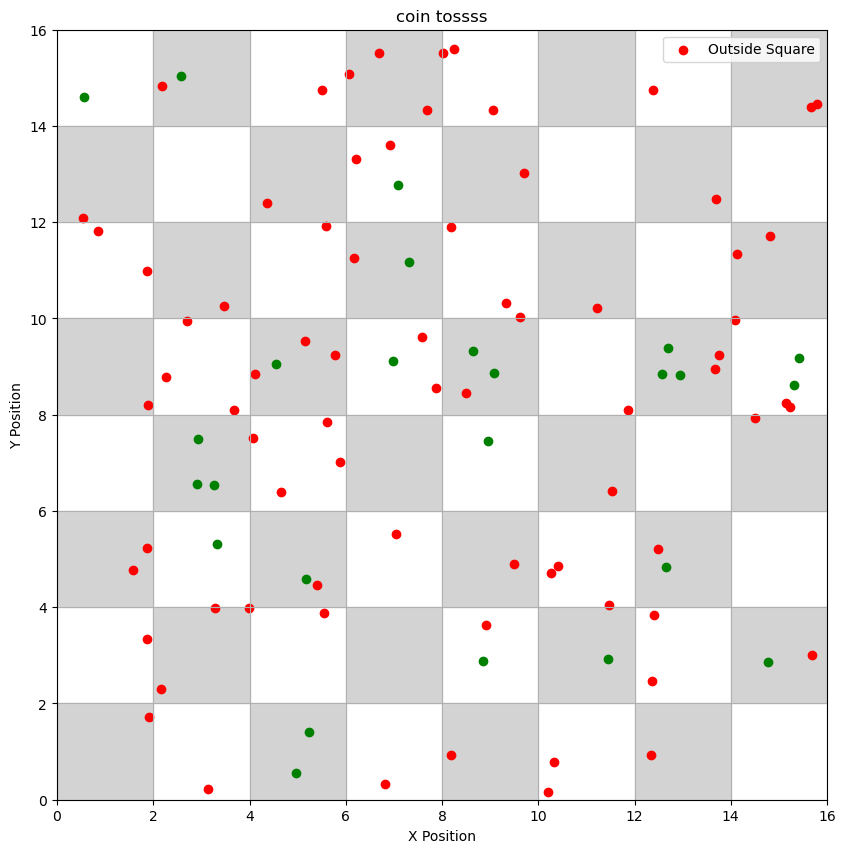

In [19]:
import numpy as np
import matplotlib.pyplot as plt

num_coins = 100
coin_diameter = 1
square_size = 2 

board_size = 8  

x_positions = np.random.uniform(0, board_size * square_size, num_coins)
y_positions = np.random.uniform(0, board_size * square_size, num_coins)


def is_within_square(x, y):
    square_x = int(x // square_size)
    square_y = int(y // square_size)
    
    square_left = square_x * square_size
    square_right = square_left + square_size
    square_bottom = square_y * square_size
    square_top = square_bottom + square_size
    

    return (square_left + coin_diameter / 2 <= x <= square_right - coin_diameter / 2 and
            square_bottom + coin_diameter / 2 <= y <= square_top - coin_diameter / 2)


within_square = [is_within_square(x, y) for x, y in zip(x_positions, y_positions)]


probability_within_square = 1 / 4 
expected_payout = probability_within_square * 1 


cost_of_playing = 0.25  

is_fair = expected_payout == cost_of_playing

print(f"nr of coins tossed: {num_coins}")
print(f"landing in a square with the chance of : {probability_within_square:.2f}")
print(f"exp payout per coin: {expected_payout:.2f} leu")
print(f"cost of the game: {cost_of_playing:.2f} leu")
print(f"fair game? {'Yes' if is_fair else 'No'}")


plt.figure(figsize=(10, 10))


for i in range(board_size):
    for j in range(board_size):
        if (i + j) % 2 == 0:
            plt.gca().add_patch(plt.Rectangle((i * square_size, j * square_size), square_size, square_size, color='lightgray'))

for i in range(num_coins):
    if within_square[i]:
        plt.scatter(x_positions[i], y_positions[i], color='green', label='Within Square' if i == 0 else "")
    else:
        plt.scatter(x_positions[i], y_positions[i], color='red', label='Outside Square' if i == 0 else "")

plt.xlim(0, board_size * square_size)
plt.ylim(0, board_size * square_size)
plt.title('coin tossss')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid()
plt.show()

problem 7 normal distribution is really fun !!!

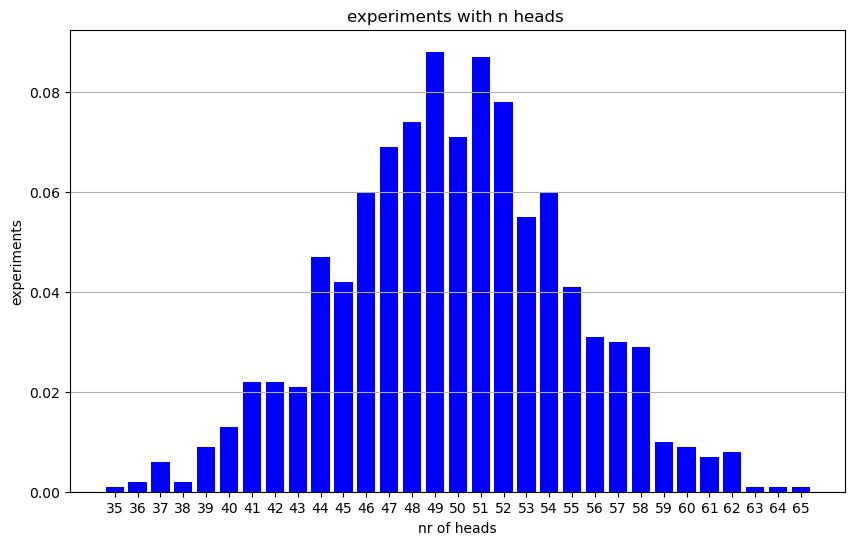

In [20]:
import numpy as np
import matplotlib.pyplot as plt

num_tosses = 100
num_experiments = 1000
lower_bound = 35
upper_bound = 65 

results = []
for i in range(num_experiments):
    tosses = np.random.binomial(n=num_tosses, p=0.5)
    results.append(tosses)

counts = np.bincount(results)

n_values = np.arange(lower_bound, upper_bound + 1)
proportions = counts[lower_bound:upper_bound + 1] / num_experiments


plt.figure(figsize=(10, 6))
plt.bar(n_values, proportions, color='blue', width=0.8)
plt.title('experiments with n heads ')
plt.xlabel('nr of heads')
plt.ylabel('experiments')
plt.xticks(n_values)
plt.grid(axis='y')

# Show the plot
plt.show()

problem 8

In [21]:
import random
n = 10
sitting_brk = []
for i in range(n):
    sitting_brk.append(i)

nr_exp = 1234
permutation = 0
for i in range(nr_exp):
    sitting_ln = sitting_brk[:]
    random.shuffle(sitting_ln)
    win = 0
    for i in range(n):
        if ((sitting_ln[(i+1)%n] != sitting_ln[i] - 1) and (sitting_ln[(i+1)%n] != sitting_ln[i] + 1)
                and (sitting_ln[(i+1)%n] != sitting_ln[(i+2)%n] - 1) and (sitting_ln[(i+1)%n] != sitting_ln[(i+2)%n] + 1)):
            win += 1
        if win == n:
            permutation += 1
print(permutation/nr_exp)



0.09805510534846029


problem 9

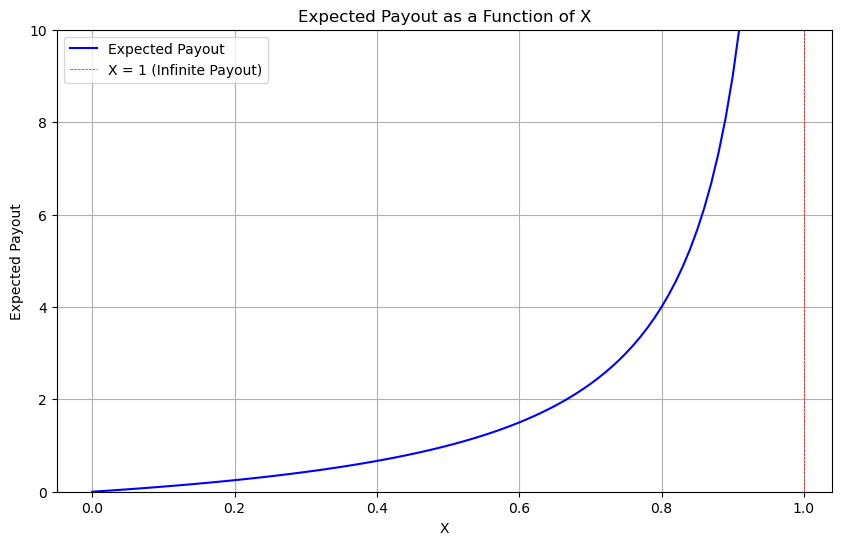

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def expected_payout(x):
    return np.where(x == 1, np.inf, x / (1 - x))

X_values = np.linspace(0, 0.99, 100)  
payouts = expected_payout(X_values)

plt.figure(figsize=(10, 6))
plt.plot(X_values, payouts, label='Expected Payout', color='blue')
plt.title('Expected Payout as a Function of X')
plt.xlabel('X')
plt.ylabel('Expected Payout')
plt.ylim(0, 10) 
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(1, color='red', lw=0.5, ls='--', label='X = 1 (Infinite Payout)')
plt.legend()
plt.grid()
plt.show()

problem 10

In [23]:
import numpy as np

ride = 6 
total_rides = 365*2

p_c = 0.05 
p_h = 0.02  # ЯЛКВМОМ


loh_for_the_first_time = 50
loh_for_the_second_time = 200
final_boss_loh = 300

def expected_cost_per_ride():
    expected_fine = (1 - p_h) * (p_c * loh_for_the_first_time + 
                                  p_c * (1 - p_c) * loh_for_the_second_time + 
                                  p_c * (1 - p_c)**2 * final_boss_loh)
    
    # я веселый таракан я бегу бегу бегу
    expected_cost = (1 - p_c) * 0 + p_c * expected_fine
    
    
    # Я Люблю Когда Волосатые Мужики Обмазываются Маслом по этому я плачу 
    expected_cost += p_h * ride
    
    return expected_cost

jora_expected_cost_per_ride = expected_cost_per_ride()
jora_total_expected_cost = jora_expected_cost_per_ride * total_rides


law_abiding_total_cost = ride * total_rides


print(f"expected cost: {jora_expected_cost_per_ride:.2f} lei")
print(f"expected cost for the year: {jora_total_expected_cost:.2f} lei")
print(f"mama i am a criminal: {law_abiding_total_cost:.2f} lei")
print(f"difference (and the moral of the story is ): {law_abiding_total_cost - jora_total_expected_cost:.2f} lei")

expected cost: 1.37 lei
expected cost for the year: 1001.08 lei
mama i am a criminal: 4380.00 lei
difference (and the moral of the story is ): 3378.92 lei
